In [16]:
!pip install --upgrade scikit-learn --quiet --disable-pip-version-check
print("scikit-learn mis à jour avec succès")

scikit-learn mis à jour avec succès


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Chargement des données ===
print("Chargement du fichier CSV nettoyé...")
df = pd.read_csv("../data/cleaned/donnees_climat_evaporation.csv")
print(f"Données chargées : {df.shape[0]} lignes, {df.shape[1]} colonnes")

Chargement du fichier CSV nettoyé...
Données chargées : 7308 lignes, 18 colonnes


In [18]:
print("Préparation des variables X (climat) et y (évaporation estimée)")

X = df.drop(columns=['Evap_estimee', 'Date', 'Station'], errors='ignore')
y = df['Evap_estimee']

print(f"{X.shape[1]} variables explicatives utilisées pour la prédiction.")

Préparation des variables X (climat) et y (évaporation estimée)
15 variables explicatives utilisées pour la prédiction.


In [19]:
print("Séparation des données en jeu d'entraînement (80%) et test (20%)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Entraînement : {X_train.shape[0]} lignes | Test : {X_test.shape[0]} lignes")

Séparation des données en jeu d'entraînement (80%) et test (20%)...
Entraînement : 5846 lignes | Test : 1462 lignes


In [21]:
print("Entraînement du modèle de Régression Linéaire...")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Prédiction terminée.")

Entraînement du modèle de Régression Linéaire...
Prédiction terminée.


In [23]:
print("Entraînement du modèle Random Forest (100 arbres)...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Prédiction terminée.")

Entraînement du modèle Random Forest (100 arbres)...
Prédiction terminée.


In [26]:
def eval_model(y_true, y_pred, model_name="Modèle"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Évaluation du {model_name} :")
    print(f"RMSE : {rmse:.3f} mm/j")
    print(f"MAE  : {mae:.3f} mm/j")
    print(f"R²   : {r2:.3f} (proche de 1 = bon ajustement)")

In [27]:
eval_model(y_test, y_pred_lr, "Régression Linéaire")
eval_model(y_test, y_pred_rf, "Random Forest")

Évaluation du Régression Linéaire :
RMSE : 0.030 mm/j
MAE  : 0.005 mm/j
R²   : 1.000 (proche de 1 = bon ajustement)
Évaluation du Random Forest :
RMSE : 0.235 mm/j
MAE  : 0.170 mm/j
R²   : 0.996 (proche de 1 = bon ajustement)


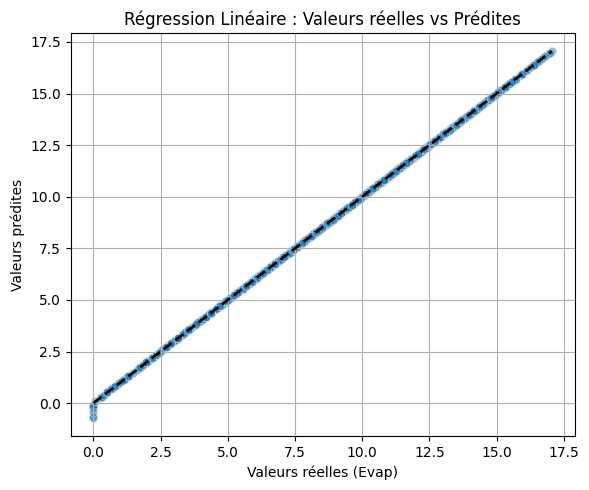

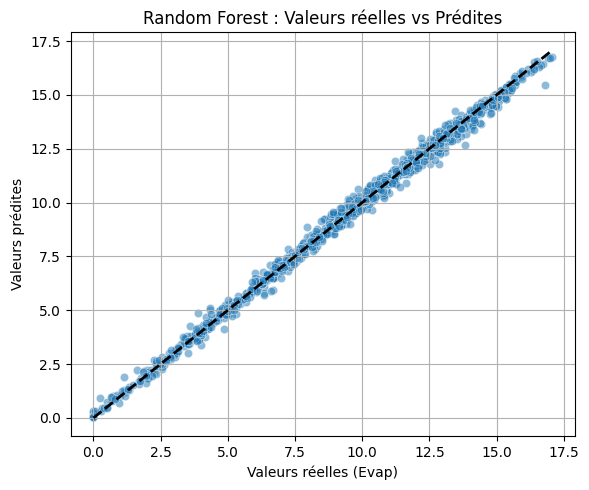

In [13]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.title(f"{model_name} : Valeurs réelles vs Prédites")
    plt.xlabel("Valeurs réelles (Evap)")
    plt.ylabel("Valeurs prédites")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, y_pred_lr, "Régression Linéaire")
plot_predictions(y_test, y_pred_rf, "Random Forest")